In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataset = pd.read_csv('heart.csv')

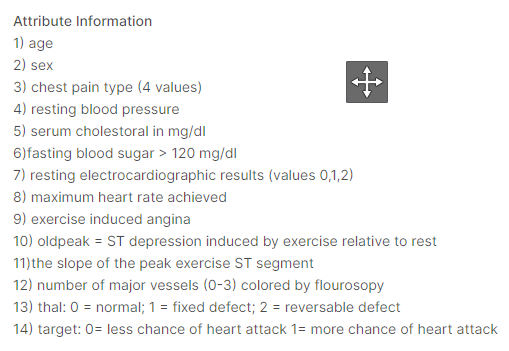

In [10]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

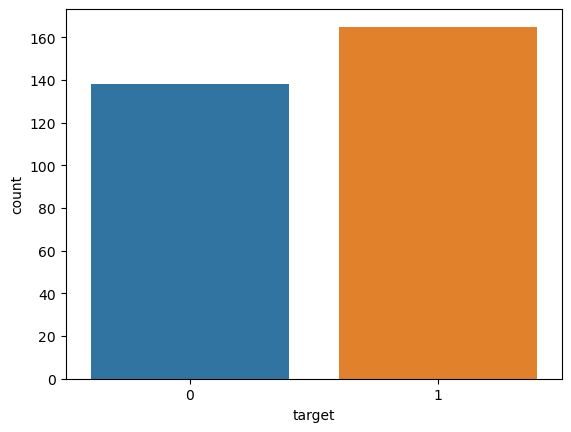

In [13]:
sns.countplot(x = 'target' , data=dataset)

<Axes: >

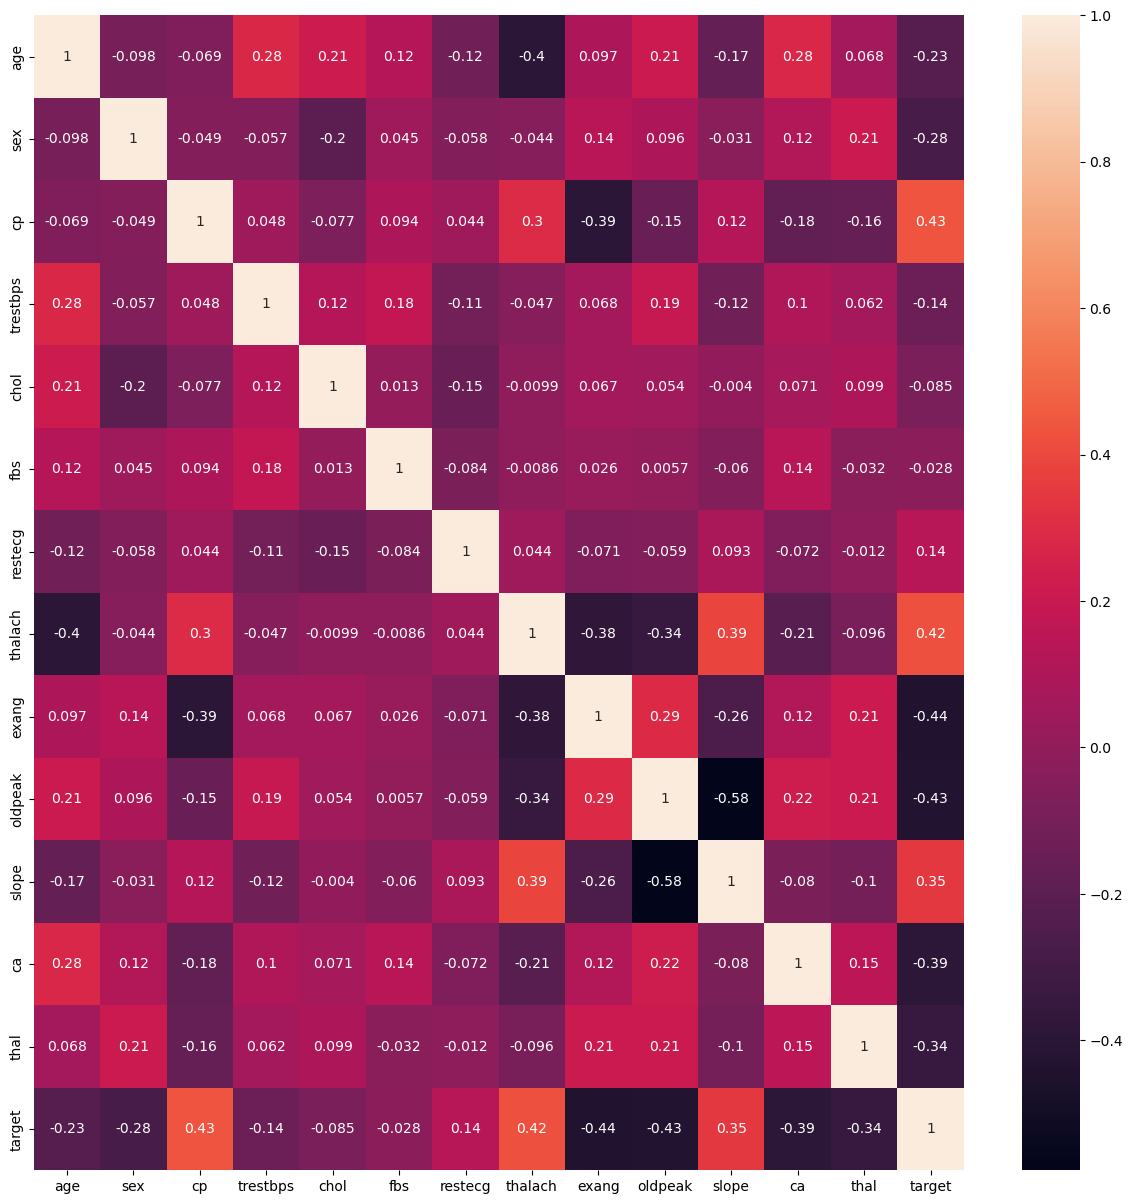

In [14]:
corr_mat = dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat , annot=True)

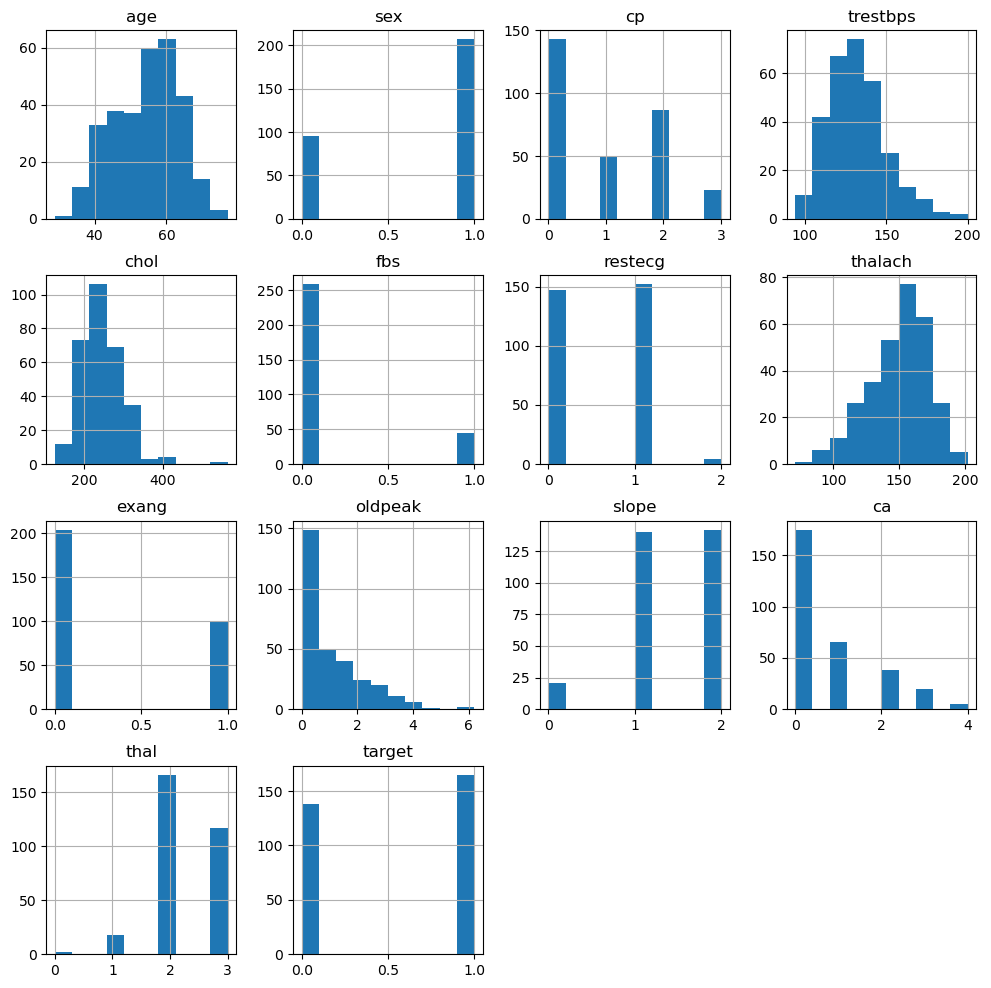

In [15]:
#plot histograms for each column

dataset.hist(figsize=(12,12))
plt.show()

**Now we need to convert some categorical variables into dummy variables**

In [16]:
dataset2 = pd.get_dummies(dataset , columns=['sex' , 'cp' , 'fbs' , 'restecg' , 'exang' , 'slope' , 'ca' , 'thal'])

In [17]:
dataset2.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [18]:
cols = ['cp_0','cp_1','cp_2','cp_3', 'trestbps', 'chol', 'fbs_0','fbs_1', 'restecg_0','restecg_1','restecg_2', 'thalach', 'exang_0','exang_1']    

In [19]:
X = dataset2[cols]
y = dataset2.target

In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state = 42)

In [22]:
x_train.shape

(227, 14)

In [23]:
x_test.shape

(76, 14)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
x_train

array([[-0.91139737,  2.34216018, -0.6815542 , ...,  0.63335882,
         0.6815542 , -0.6815542 ],
       [-0.91139737, -0.42695628,  1.46723474, ..., -0.69663611,
         0.6815542 , -0.6815542 ],
       [ 1.09721625, -0.42695628, -0.6815542 , ...,  0.58902565,
         0.6815542 , -0.6815542 ],
       ...,
       [-0.91139737, -0.42695628, -0.6815542 , ..., -0.8296356 ,
         0.6815542 , -0.6815542 ],
       [ 1.09721625, -0.42695628, -0.6815542 , ..., -0.25330447,
         0.6815542 , -0.6815542 ],
       [-0.91139737,  2.34216018, -0.6815542 , ...,  1.29835628,
         0.6815542 , -0.6815542 ]])

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train , y_train)

KNeighborsClassifier()

In [27]:
y_pred = classifier.predict(x_test)

In [28]:
x_test

array([[ 1.09721625, -0.42695628, -0.6815542 , ..., -1.67196572,
        -1.46723474,  1.46723474],
       [-0.91139737, -0.42695628, -0.6815542 , ...,  0.41169299,
         0.6815542 , -0.6815542 ],
       [-0.91139737, -0.42695628,  1.46723474, ...,  1.03235729,
         0.6815542 , -0.6815542 ],
       ...,
       [ 1.09721625, -0.42695628, -0.6815542 , ...,  1.60868842,
         0.6815542 , -0.6815542 ],
       [ 1.09721625, -0.42695628, -0.6815542 , ..., -0.78530243,
         0.6815542 , -0.6815542 ],
       [-0.91139737,  2.34216018, -0.6815542 , ...,  0.23436034,
         0.6815542 , -0.6815542 ]])

In [29]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

<Axes: >

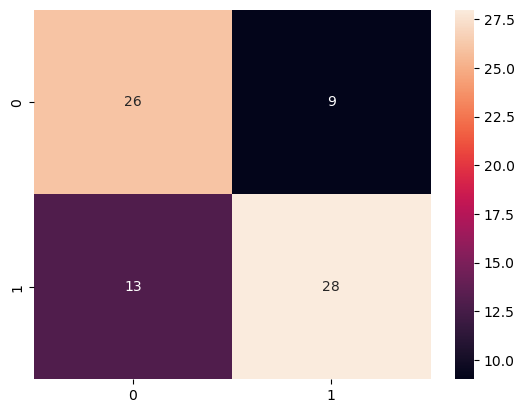

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.7105263157894737

In [33]:
import pickle
pickle.dump(classifier , open('model.pkl' , 'wb'))
pickle.dump(sc , open('sc.pkl','wb'))